In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
conn = sqlite3.connect("/data/movie-lens.db")

In [3]:
movies = pd.read_sql("select * from movies", conn)
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_sql("select * from ratings", conn)
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


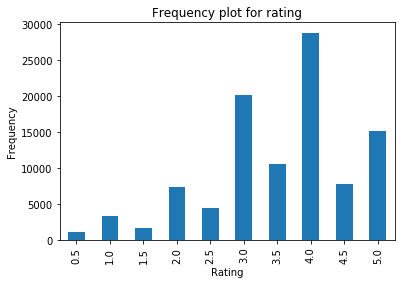

In [5]:
ratings.rating.value_counts().sort_index().plot.bar()
plt.title("Frequency plot for rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.savefig("/tmp/rating.jpeg")

In [6]:
agg = ratings.groupby("movieId").rating.agg([np.mean, len])
agg.head()

,mean,len
movieId,,
1,3.872470,247.0
2,3.401869,107.0
3,3.161017,59.0
4,2.384615,13.0
5,3.267857,56.0


In [7]:
agg.to_sql("rating_avg", conn, if_exists="append") # Save the dataframe to database